In [1]:
import pandas as pd, numpy as np
import matplotlib, seaborn as sns
matplotlib.use('Qt5Agg')
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,3.5)
plt.rcParams['figure.constrained_layout.use'] = True

In [43]:
# load data
mydateparser = lambda x: pd.datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S')
btc_series = pd.read_excel('Data/BTC_closing.xlsx',squeeze=True, parse_dates=[0], index_col=0, date_parser=mydateparser)

In [44]:
# crop data: 2015-08-07 to 2020-06-26
start_date = '2015-08-07'
end_date = '2020-06-26'
btc_series = btc_series[start_date: end_date]

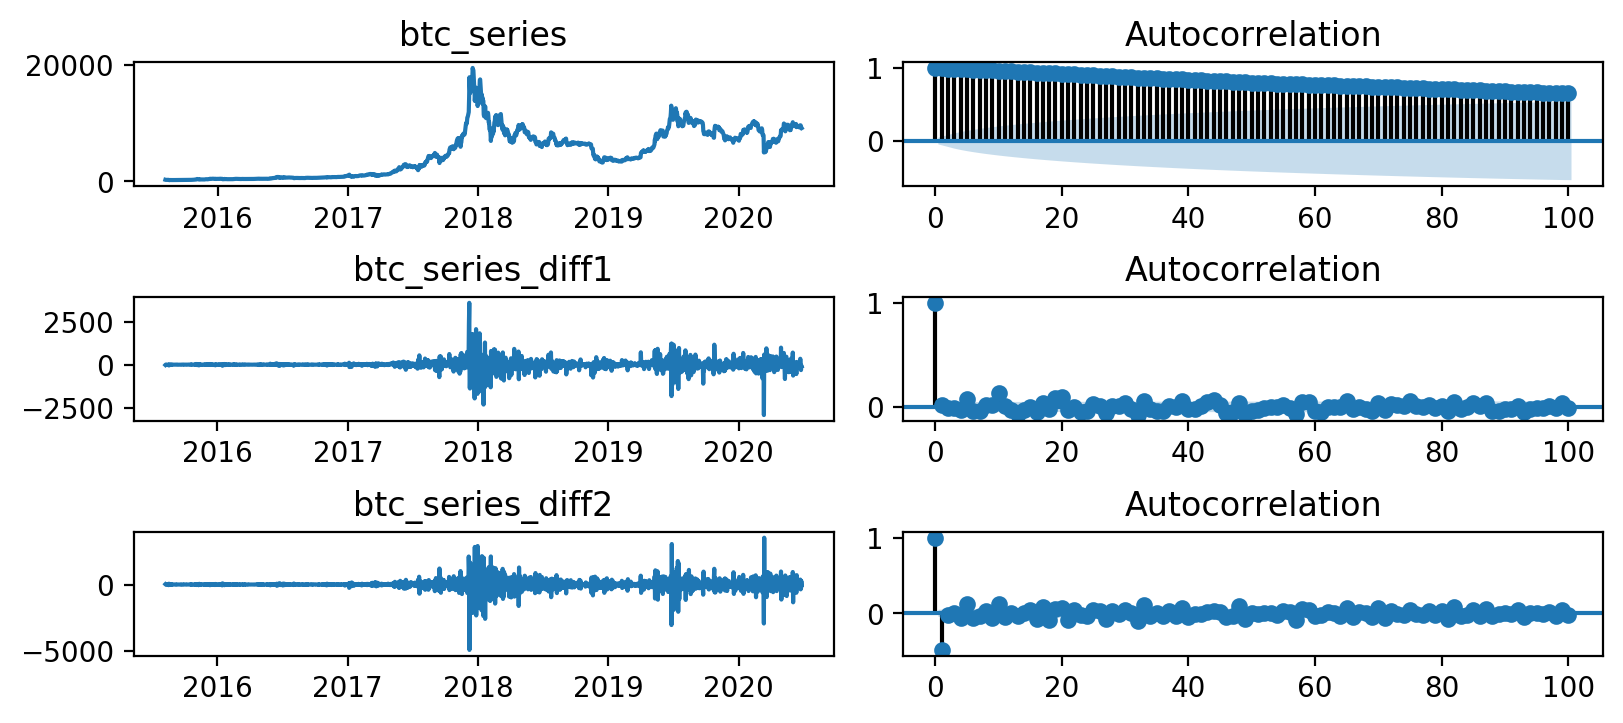

In [45]:
# raw series differencing and acf overview
from statsmodels.graphics.tsaplots import plot_acf
#Original series
fig, axes = plt.subplots(3,2)
axes[0,0].plot(btc_series); axes[0,0].set_title('btc_series')
plot_acf(btc_series, ax=axes[0,1], lags=100)

#1st difference
axes[1,0].plot(btc_series.diff().dropna()); axes[1,0].set_title('btc_series_diff1')
plot_acf((btc_series.diff().dropna()), ax=axes[1,1], lags=100)

#2nd difference
axes[2,0].plot(btc_series.diff().diff().dropna()); axes[2,0].set_title('btc_series_diff2')
plot_acf(btc_series.diff().diff().dropna(), ax=axes[2,1], lags=100)

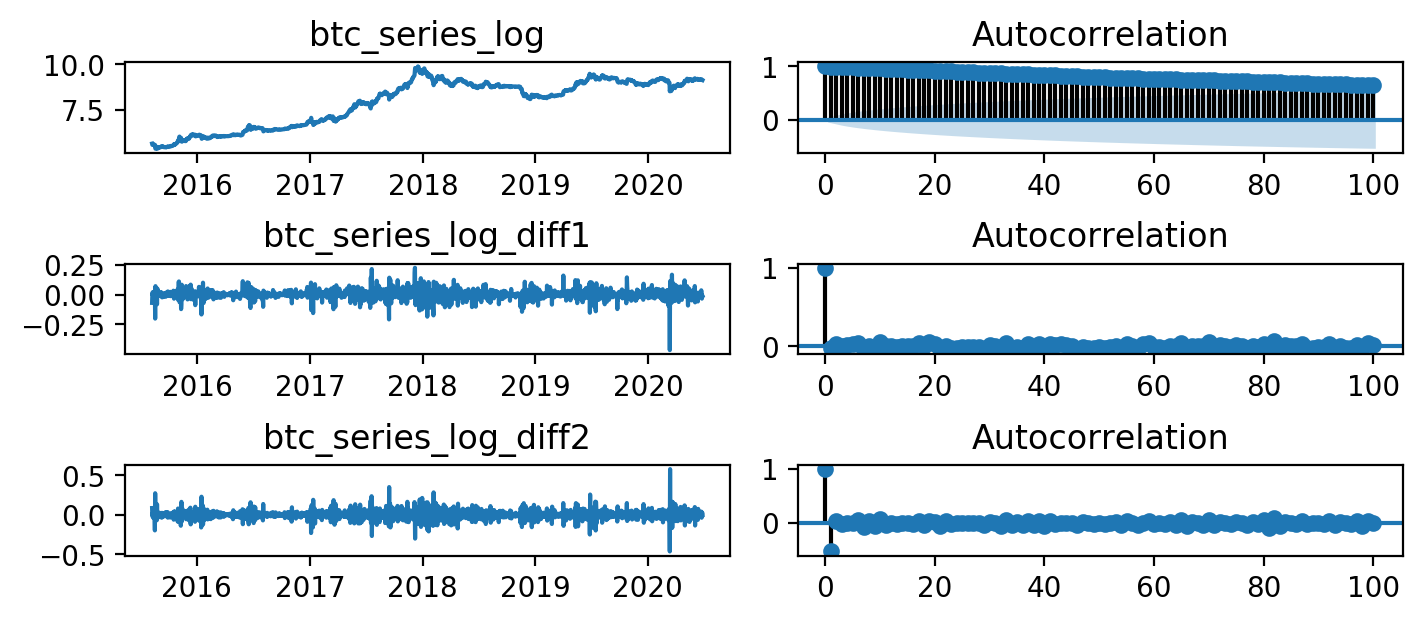

In [8]:
# log series differencing and acf overview
btc_log = np.log(btc_series)

#Original series
fig, axes = plt.subplots(3,2)
axes[0,0].plot(btc_log); axes[0,0].set_title('btc_series_log')
plot_acf(btc_series, ax=axes[0,1], lags=100)

#1st difference
axes[1,0].plot(btc_log.diff().dropna()); axes[1,0].set_title('btc_series_log_diff1')
plot_acf((btc_log.diff().dropna()), ax=axes[1,1], lags=100)

#2nd difference
axes[2,0].plot(btc_log.diff().diff().dropna()); axes[2,0].set_title('btc_series_log_diff2')
plot_acf(btc_log.diff().diff().dropna(), ax=axes[2,1], lags=100)

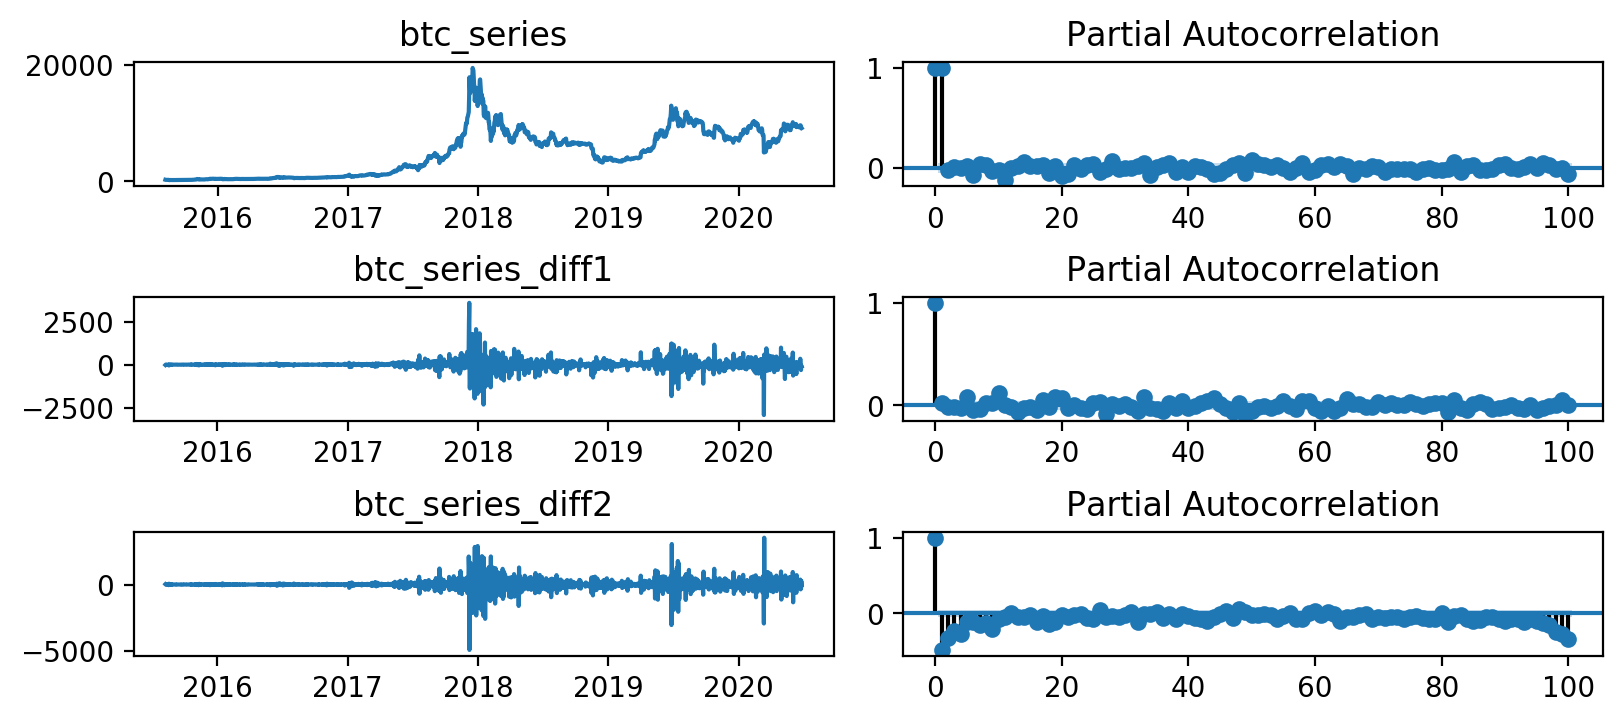

In [46]:
# raw series differencing and pacf overview
from statsmodels.graphics.tsaplots import plot_pacf
#Original series
fig, axes = plt.subplots(3,2)
axes[0,0].plot(btc_series); axes[0,0].set_title('btc_series')
plot_pacf(btc_series, ax=axes[0,1], lags=100)

#1st difference
axes[1,0].plot(btc_series.diff().dropna()); axes[1,0].set_title('btc_series_diff1')
plot_pacf((btc_series.diff().dropna()), ax=axes[1,1], lags=100)

#2nd difference
axes[2,0].plot(btc_series.diff().diff().dropna()); axes[2,0].set_title('btc_series_diff2')
plot_pacf(btc_series.diff().diff().dropna(), ax=axes[2,1], lags=100)


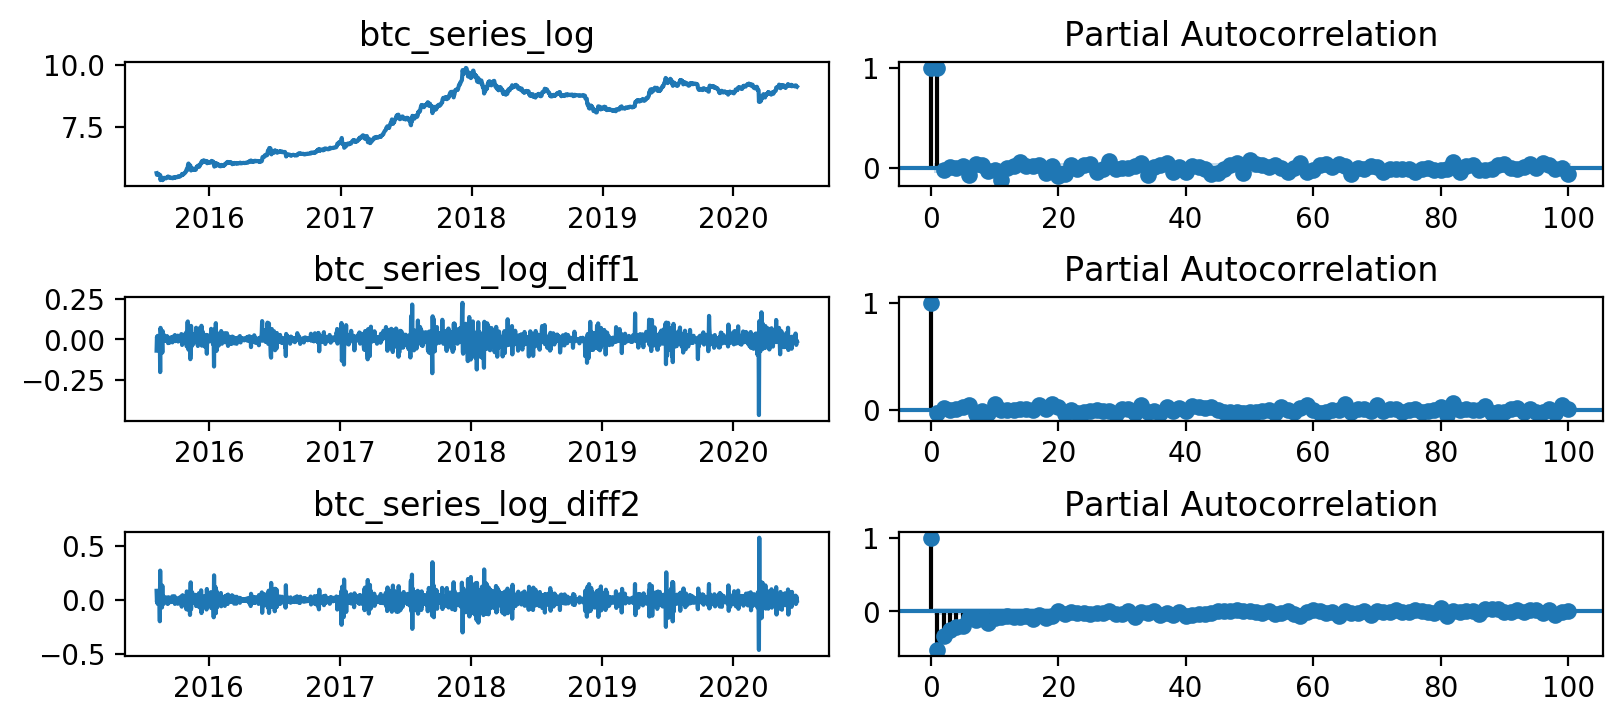

In [47]:
# log series differencing and pacf overview
btc_log = np.log(btc_series)

#Original series
fig, axes = plt.subplots(3,2)
axes[0,0].plot(btc_log); axes[0,0].set_title('btc_series_log')
plot_pacf(btc_series, ax=axes[0,1], lags=100)

#1st difference
axes[1,0].plot(btc_log.diff().dropna()); axes[1,0].set_title('btc_series_log_diff1')
plot_pacf((btc_log.diff().dropna()), ax=axes[1,1], lags=100)

#2nd difference
axes[2,0].plot(btc_log.diff().diff().dropna()); axes[2,0].set_title('btc_series_log_diff2')
plot_pacf(btc_log.diff().diff().dropna(), ax=axes[2,1], lags=100)

In [9]:
from pmdarima.arima.utils import ndiffs
print('ADF_order:\t', ndiffs(btc_series, test='adf'))
print('PP_order:\t', ndiffs(btc_series, test='pp'))
print('KPSS_order:\t', ndiffs(btc_series, test='kpss'))

ADF_order:	 1
PP_order:	 1
KPSS_order:	 1


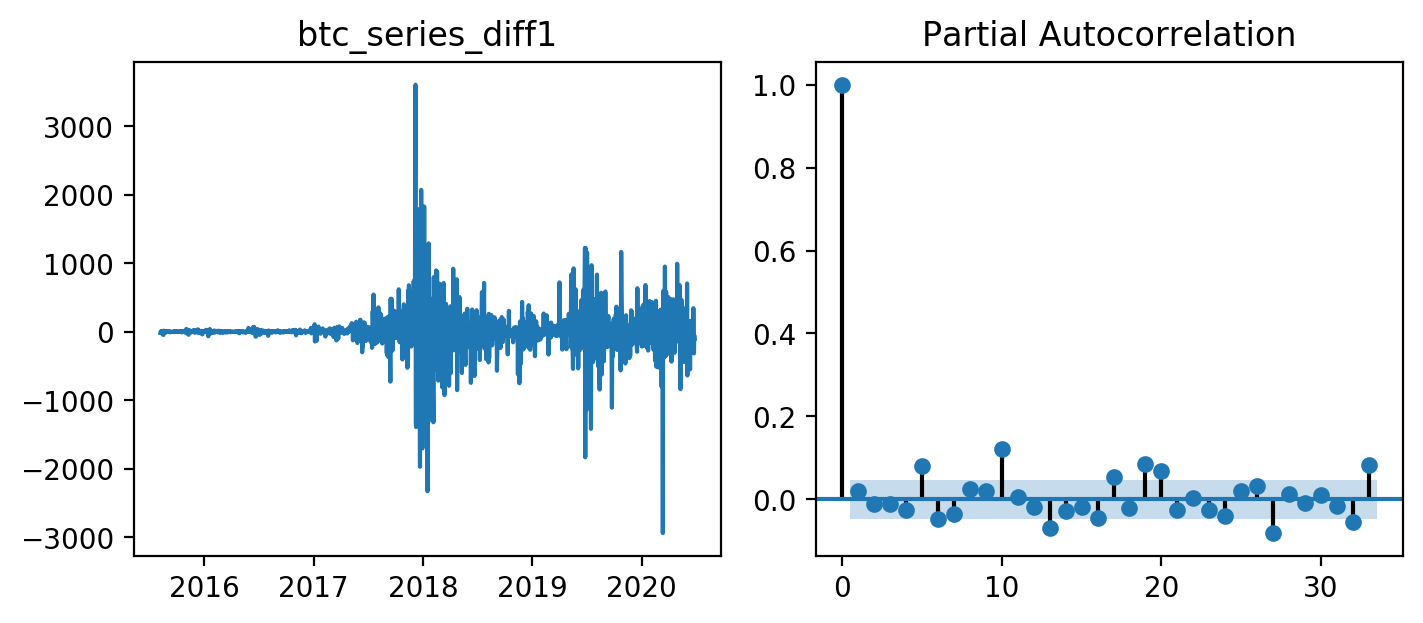

In [10]:
from statsmodels.graphics.tsaplots import plot_pacf
fig, axes = plt.subplots(1,2)
axes[0].plot(btc_series.diff().dropna()); axes[0].set_title('btc_series_diff1')
plot_pacf(btc_series.diff().dropna(), ax=axes[1])

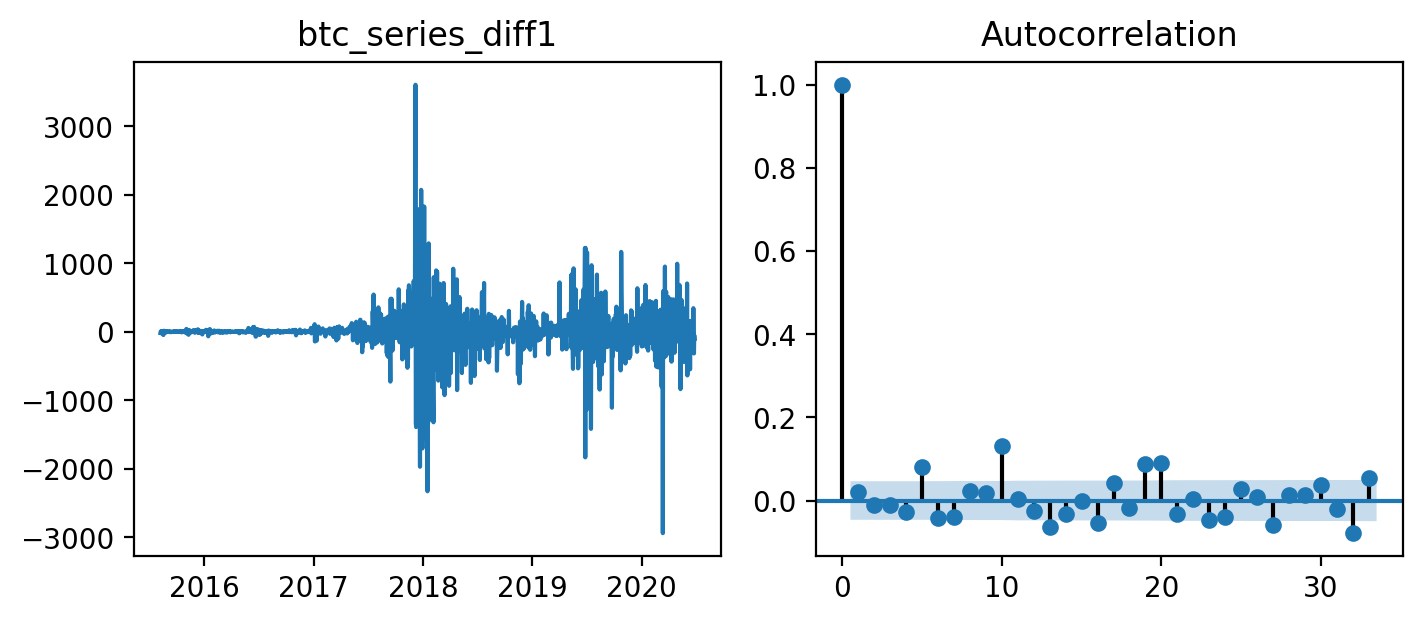

In [11]:
from statsmodels.graphics.tsaplots import plot_acf
fig, axes = plt.subplots(1,2)
axes[0].plot(btc_series.diff().dropna()); axes[0].set_title('btc_series_diff1')
plot_acf(btc_series.diff().dropna(), ax=axes[1])

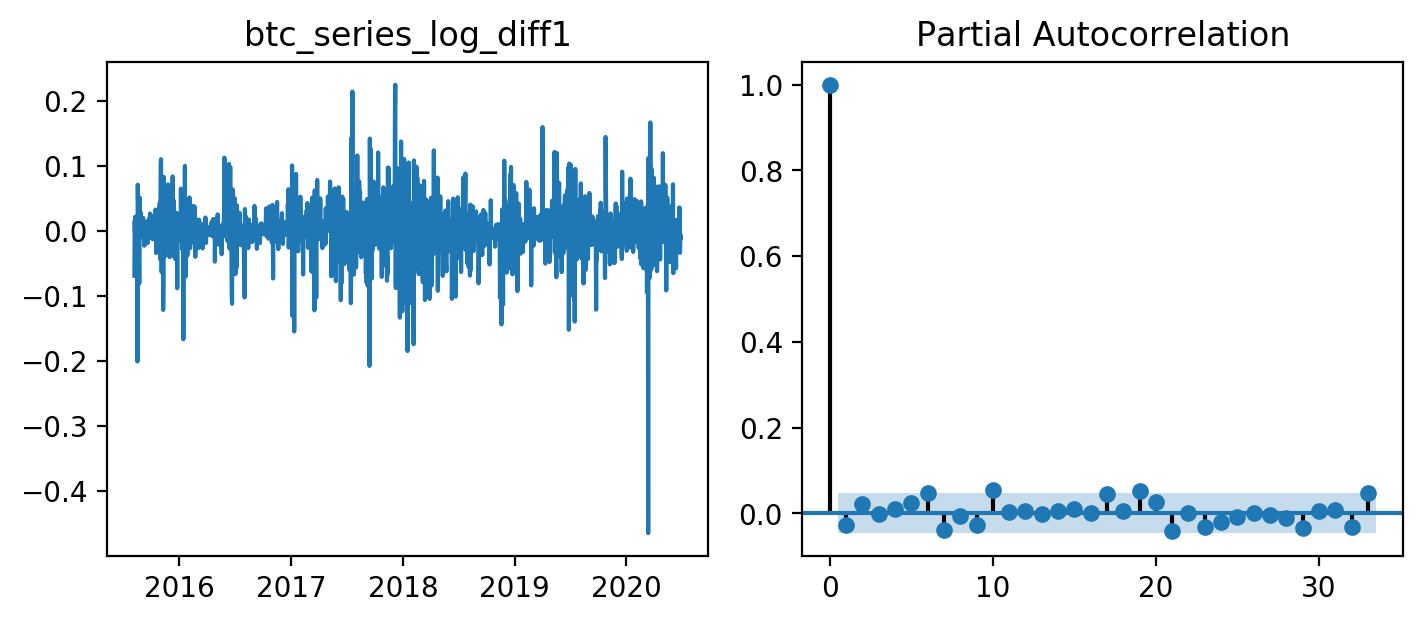

In [12]:
from statsmodels.graphics.tsaplots import plot_pacf
fig, axes = plt.subplots(1,2)
axes[0].plot(btc_log.diff().dropna()); axes[0].set_title('btc_series_log_diff1')
plot_pacf(btc_log.diff().dropna(), ax=axes[1])

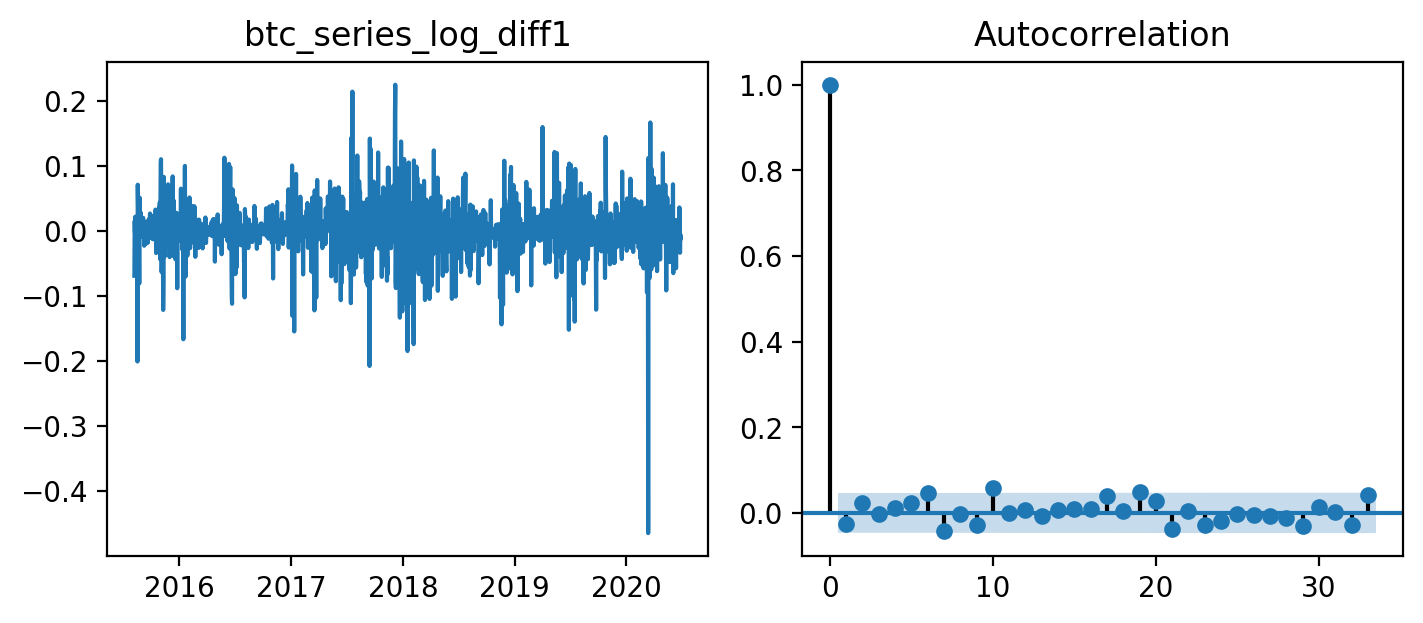

In [13]:
from statsmodels.graphics.tsaplots import plot_acf
fig, axes = plt.subplots(1,2)
axes[0].plot(btc_log.diff().dropna()); axes[0].set_title('btc_series_log_diff1')
plot_acf(btc_log.diff().dropna(), ax=axes[1])

In [15]:
# manually compare different ARIMA(p,d,q) variants for lowest AIC
from statsmodels.tsa.arima_model import ARIMA
import warnings
# +++ WARNING: CAN TAKE AGES +++

def evaluate_arima_variants(p_values, q_values):
    min_aic, opt_order = float('inf'), None
    for p in p_values:
        for q in q_values:
            current_order = (p, 1, q)
            try:
                model = ARIMA(np.log(btc_series), order=current_order)
                model_fit = model.fit(disp=False)
                print('Current try: ARIMA{}'.format(current_order))
                if model_fit.aic < min_aic:
                    min_aic, opt_order = model_fit.aic, current_order
            except:
                continue
    opt_model = ARIMA(np.log(btc_series), order=opt_order)
    opt_fitted = opt_model.fit(disp=False)
    print('Best fit: ARIMA{}\nAIC:   {}\nBIC:   {}\nHQIC:  {}'.format(opt_order, opt_fitted.aic, opt_fitted.bic, opt_fitted.hqic))
        
p_values = [0, 5, 6]
q_values = [0, 5, 10]
warnings.filterwarnings('ignore')
#evaluate_arima_variants(p_values, q_values)

Current try: ARIMA(0, 1, 0)
Current try: ARIMA(0, 1, 5)
Current try: ARIMA(0, 1, 10)
Current try: ARIMA(5, 1, 0)
Current try: ARIMA(5, 1, 5)
Current try: ARIMA(5, 1, 10)
Current try: ARIMA(10, 1, 0)
Current try: ARIMA(10, 1, 5)
Current try: ARIMA(10, 1, 10)
ARIMA(0, 1, 10)
AIC:   -7962.5181209468765
BIC:   -7894.234688698755
HQIC:  -7937.559129506748


In [14]:
# split data into train and test
train_size = int(len(btc_series) * 0.8)
train, test = btc_series[:train_size], btc_series[train_size:]
print('train:', len(train), '\ntest:', len(test), '\nSUM:', len(train) + len(test), '\nlen btc_series:', len(btc_series))

train: 1428 
test: 358 
SUM: 1786 
len btc_series: 1786


In [10]:
# build ARIMA(0,1,10)
order = (0,1,10)

import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(np.log(train), order=order)
model_fitted = model.fit(disp=False)
print('ARIMA{}\nAIC:   {}\nBIC:   {}\nHQIC:  {}\n'.format(order, model_fitted.aic, model_fitted.bic, model_fitted.hqic))
print(model_fitted.summary())


ARIMA(0, 1, 10)
AIC:   -6469.983617993512
BIC:   -6404.382024293289
HQIC:  -6445.73242302869

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1749
Model:                ARIMA(0, 1, 10)   Log Likelihood                3246.992
Method:                       css-mle   S.D. of innovations              0.038
Date:                Wed, 08 Jul 2020   AIC                          -6469.984
Time:                        11:35:51   BIC                          -6404.382
Sample:                    07-08-2014   HQIC                         -6445.732
                         - 04-21-2019                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0012      0.001      1.256      0.209      -0.001       0.003
ma.L1.D.Close      0.0161

Date
2015-08-07      279.58
2015-08-08      261.00
2015-08-09      265.08
2015-08-10      264.47
2015-08-11      270.39
                ...   
2019-06-30    10817.16
2019-07-01    10583.13
2019-07-02    10801.68
2019-07-03    11961.27
2019-07-04    11215.44
Name: Close, Length: 1428, dtype: float64

In [32]:
# Auto fit ARIMA model: model 04
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

a01 = btc_series
a02 = btc_log
a03 = train
a04 = np.log(train)

model_auto = pm.auto_arima(a04, start_p=0, start_q=0, max_p=11, max_q=11,
                      test='adf',
                      m=1,
                      d=None,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      seasonal=False,
                      stepwise=True)

print(model_auto.summary())

Performing stepwise search to minimize aic
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=True]; AIC=-5157.707, BIC=-5147.180, Time=0.187 seconds
Fit ARIMA(1,1,0)x(0,0,0,0) [intercept=True]; AIC=-5155.750, BIC=-5139.960, Time=1.039 seconds
Fit ARIMA(0,1,1)x(0,0,0,0) [intercept=True]; AIC=-5155.749, BIC=-5139.959, Time=0.227 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=False]; AIC=-5153.646, BIC=-5148.383, Time=0.175 seconds
Fit ARIMA(1,1,1)x(0,0,0,0) [intercept=True]; AIC=-5153.750, BIC=-5132.696, Time=0.494 seconds
Total fit time: 2.135 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1428
Model:               SARIMAX(0, 1, 0)   Log Likelihood                2580.853
Date:                Sat, 01 Aug 2020   AIC                          -5157.707
Time:                        12:52:06   BIC                          -5147.180
Sample:                             0   HQIC                 

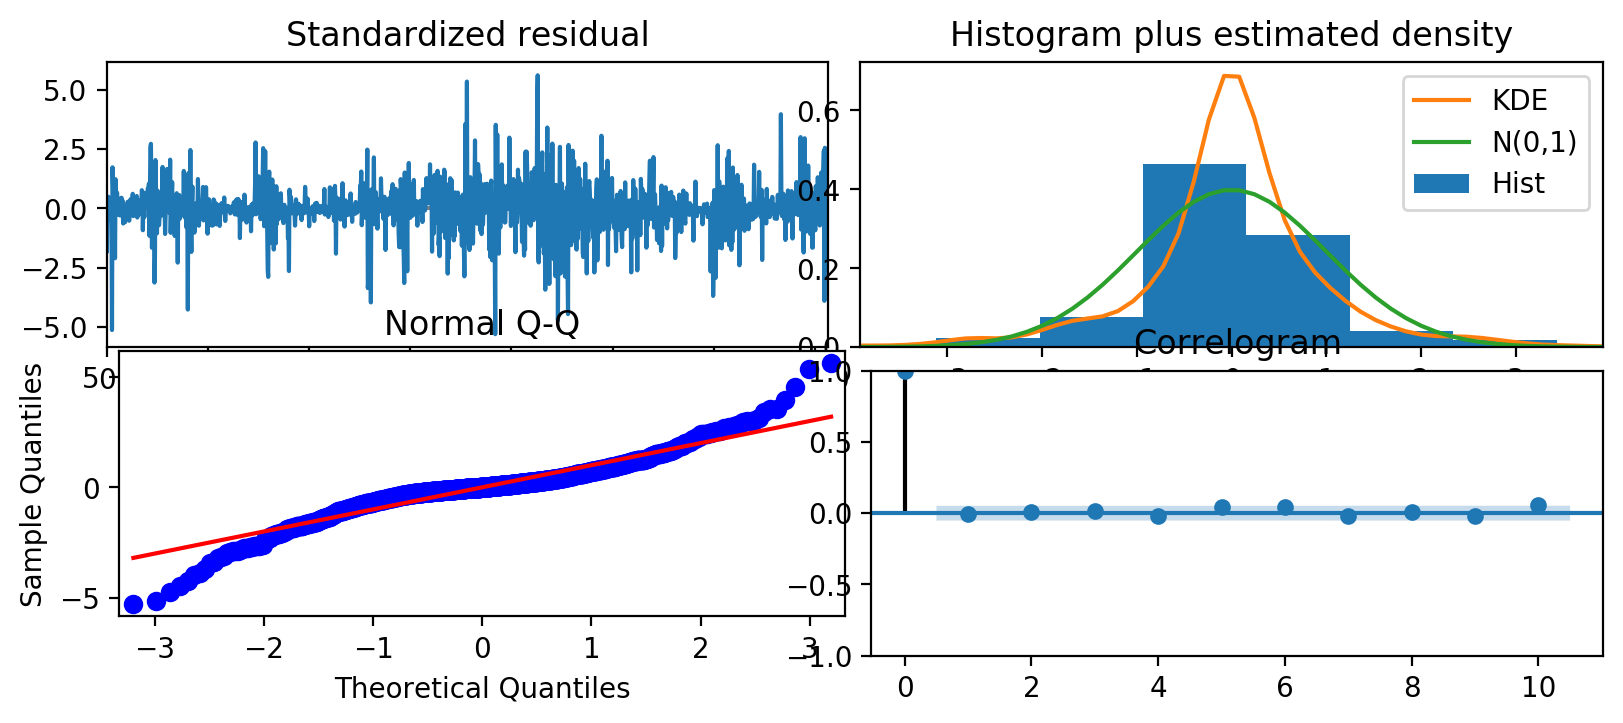

In [29]:
# model 04: review residual errors
model_auto.plot_diagnostics()

In [33]:
# model 04: forecast n_periods
n_periods= len(test)
predictions, conf_int = model_auto.predict(n_periods, return_conf_int=True)
index_pred = np.arange(len(train) + 1, len(btc_series) + 1)

# make series for plotting
predicted_series = np.exp(pd.Series(predictions, index=index_pred))
test_series = pd.Series(test.values, index=index_pred)
lower_band = np.exp(pd.Series(conf_int[:, 0], index=index_pred))
upper_band = np.exp(pd.Series(conf_int[:, 1], index=index_pred))

# plot
plt.plot(train.values, label='training')
plt.plot(test_series, label='actual')
plt.plot(predicted_series, color='darkgreen', label='prediction')
plt.fill_between(lower_band.index, lower_band, upper_band, color='k', alpha=0.15)
plt.legend(loc='upper left')
plt.show()

In [34]:
# model 04: error measures (for n_periods or rolling forecast)
from sklearn.metrics import mean_squared_error as mse

def prediction_accuracy(predictions, actual):
    # MAPE: Mean absolute percentage error
    mape = np.mean(np.abs(predictions - actual) / np.abs(actual))
    # MPE: Mean percentage error
    mpe = np.mean((predictions - actual) / actual)
    # ME: Mean error
    me = np.mean(predictions - actual)
    # MAE: Mean absolute error
    mae = np.mean(np.abs(predictions - actual))
    # RSME: Root mean squared error
    rmse = np.sqrt(mse(predictions, actual))
    # CORR: Correlation between Prediction and Actual
    corr = np.corrcoef(predictions, actual)[0,1]
    
    print('Mean absolute percentage error:\t', mape,\
             '\nMean percentage error:\t\t', mpe,\
             '\nMean error:\t\t\t', me, \
             '\nMean absolute error:\t\t', mae, \
             '\nRoot mean squared error:\t', rmse, \
             '\nCorrelation coefficient:\t', corr, '\n')
    return

prediction_accuracy(predictions, test.values)

Mean absolute percentage error:	 0.998854546401019 
Mean percentage error:		 -0.998854546401019 
Mean error:			 -8796.7548068202 
Mean absolute error:		 8796.7548068202 
Root mean squared error:	 8910.007893391727 
Correlation coefficient:	 -0.40228336969582695 



In [36]:
# model 04: 1 period rolling forecast
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
import warnings
warnings.filterwarnings('ignore')

model_a04 = (0,1,0)
history = [x for x in train]
predictions = list()
predictions = list()

for i in range(len(test)):
    model = pm.ARIMA(order = model_a04)
    model_fitted = model.fit(y = np.log(history), disp=False)
    yhat = model_fitted.predict(n_periods=1, return_conf_int=False)[0]
    predictions.append(np.exp(yhat))
    history.append(test[i])

print('Predictions: ', predictions)

Predictions:  [11244.491772759346, 11006.713626508157, 11237.539116092637, 11480.616018447536, 12318.481550309696, 12607.273863328766, 12188.553598765258, 11388.040673960759, 11846.858175474936, 11421.829300048636, 10281.801590473768, 10922.876629855353, 9500.874504952177, 9717.700082689724, 10693.468568579787, 10557.262804327507, 10794.415707486187, 10625.82517940832, 10368.987834815298, 9925.223783420768, 9836.085621403336, 9936.29422583844, 9894.606244738332, 9500.738153921166, 9576.13587030814, 9542.305638179314, 9630.835424382005, 10110.531771185491, 10425.549179742111, 10544.407378283673, 10848.917893509095, 10997.824708450606, 11835.97609793977, 11507.412949519721, 11972.697276455432, 11997.196693285743, 11893.36844393943, 11382.782927392976, 11552.86923440888, 11411.43557407414, 10923.068809202383, 10076.257941477488, 10336.90535871264, 10399.874318819544, 10256.810555946471, 10371.220129994605, 10943.242026510157, 10789.919939884949, 10162.760105289966, 10155.73085686932, 1043

In [39]:
# make series for plotting
index_pred = np.arange(len(train) + 1, len(btc_series) + 1)
predicted_series = pd.Series(predictions, index=index_pred)
test_series = pd.Series(test.values, index=index_pred)

# plot
plt.plot(train.values, label='training')
plt.plot(test_series, label='actual')
plt.plot(predicted_series, color='darkgreen', label='prediction')
plt.legend(loc='upper left')
plt.show()

In [40]:
# prediction accuracy for rolling forecast
prediction_accuracy(predictions, test.values)

Mean absolute percentage error:	 0.025484287431655005 
Mean percentage error:		 0.003674847945119118 
Mean error:			 24.959781745235034 
Mean absolute error:		 216.45288478960595 
Root mean squared error:	 340.105196576871 
Correlation coefficient:	 0.9715393129190444 



1786

1786